In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
df = pd.read_csv("data.csv")

In [62]:
df.shape[0]

200

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Assumptions :
1. The Data is on monthly basis.
2. Spending Score is the score you get by spending more .
3. Spending score doesnot add up to whole life.
4. Spending score doesnot depends on what item one buys.

In [5]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [98]:
df.rename(columns={'Annual Income (k$)' : 'Annual_income'}, inplace=True)
df.rename(columns={'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)

In [99]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_income', 'Spending_Score'], dtype='object')

In [23]:
df['Age'].isna().value_counts()

False    200
Name: Age, dtype: int64

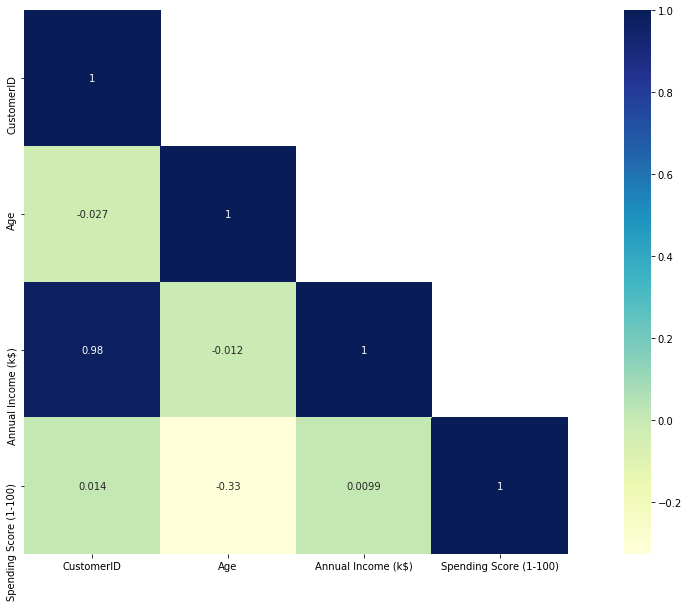

In [36]:
corr = df[['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask, square=True,annot=True, cmap="YlGnBu")

Female    112
Male       88
Name: Genre, dtype: int64

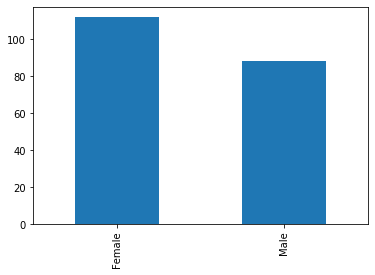

In [35]:
df["Genre"].value_counts().plot.bar()
df["Genre"].value_counts()

In [37]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

45

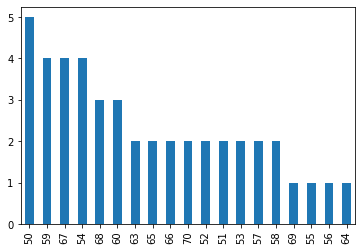

In [112]:
df.loc[df["Age"]>=50, 'Age'].value_counts().plot.bar()
df.loc[df["Age"]>=50, 'Age'].value_counts().sum()

155

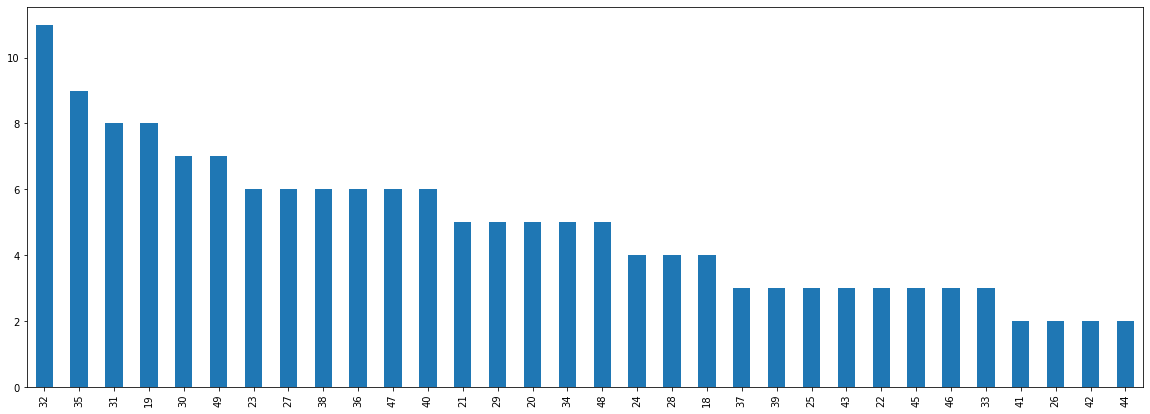

In [111]:
df.loc[df.Age<50, 'Age'].value_counts().plot.bar(figsize=[20,7])
df.loc[df.Age<50, 'Age'].value_counts().sum()

In [125]:
tot =0
for i in range(10, df.Age.max()+1,10):
    j = i-10
    print("From age group of {} to {}".format(j,i))
    peps = df.loc[(df.Age<=i) & (df.Age>j), 'Age'].value_counts().sum()
    score = df.loc[(df.Age<=i) & (df.Age>j), 'Spending_Score'].sum()/peps
    print(peps)
    print('score {:.2f}'.format(score))
    tot+=peps
print(tot)

From age group of 0 to 10
0
score nan
From age group of 10 to 20
17
score 44.65
From age group of 20 to 30
45
score 67.22
From age group of 30 to 40
60
score 57.50
From age group of 40 to 50
38
score 34.39
From age group of 50 to 60
23
score 32.52
From age group of 60 to 70
17
score 44.18
200


/home/sanjeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


## conclusions

1. Significant mall goers are from age 20 to 50
2. Most significant figure in that comes from the age group of 30 and 40.
3. Even thought people in age 30-40 goes to the mall the most they do not spend the most.
4. The most amount is spend by the people of age 20-30.
5. Also the people of age group 60-70 has spends significantly more.(sort of outliers)

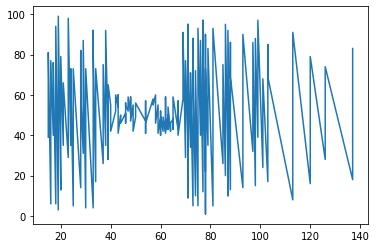

In [127]:
plt.plot(df.Annual_income,df.Spending_Score)

In [150]:
spent = df[(df.Annual_income<=70) & (df.Annual_income>=40)]['Spending_Score']

In [151]:
income = df[(df.Annual_income<=70) & (df.Annual_income>=40)]['Annual_income']

## conclusions

The income of people around 40-70k seems to spend significantly less than others.